# lets import library and datasets


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("C:/Users/dread-miles/Documents/Data Sets/udemy_data_sets/Project 5/traffic-signs-data/train.p",mode='rb') as training_data:
    train=pickle.load(training_data)
with open("C:/Users/dread-miles/Documents/Data Sets/udemy_data_sets/Project 5/traffic-signs-data/test.p",mode='rb') as testing_data:
    test=pickle.load(testing_data)
with open("C:/Users/dread-miles/Documents/Data Sets/udemy_data_sets/Project 5/traffic-signs-data/valid.p",mode='rb') as validating_data:
    val=pickle.load(validating_data)

In [3]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [4]:
x_train,y_train=train["features"],train['labels']
x_test,y_test=test["features"],test["labels"]
x_val,y_val=val["features"],val["labels"]

In [5]:
x_train.shape,x_test.shape,x_val.shape

((34799, 32, 32, 3), (12630, 32, 32, 3), (4410, 32, 32, 3))

In [6]:
y_train.shape,y_test.shape,y_val.shape

((34799,), (12630,), (4410,))

# explore some data

In [7]:
len(x_train)

34799

39

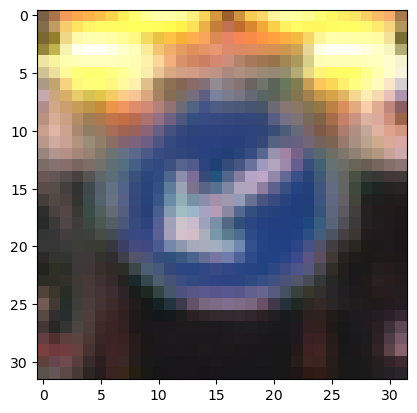

In [8]:
i=3215
plt.imshow(x_val[i])
y_val[i]

1

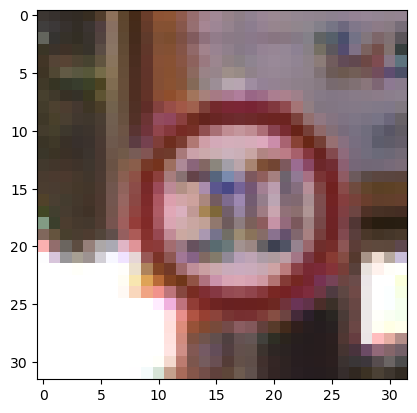

In [9]:
i=3215
plt.imshow(x_train[i])
y_train[i]

# lets preprocess our data sets

In [10]:
#lets do some re-shuffling our data
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)

In [11]:
x_train_gray=np.sum(x_train/3,axis=3,keepdims=True)

In [12]:
x_test_gray=np.sum(x_test/3,axis=3,keepdims=True)

In [13]:
x_val_gray=np.sum(x_val/3,axis=3,keepdims=True)

In [14]:
x_train_gray.shape,x_val_gray.shape,x_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [15]:
np.min(x_train_gray)

3.666666666666666

# and know lets normalize the data

In [16]:
x_train_gray_norm=(x_train_gray-128)/128
x_test_gray_norm=(x_test_gray-128)/128
x_val_gray_norm=(x_val_gray-128)/128

In [22]:
len(x_train_gray_norm),len(x_test_gray_norm),len(x_val_gray_norm)

(34799, 12630, 4410)

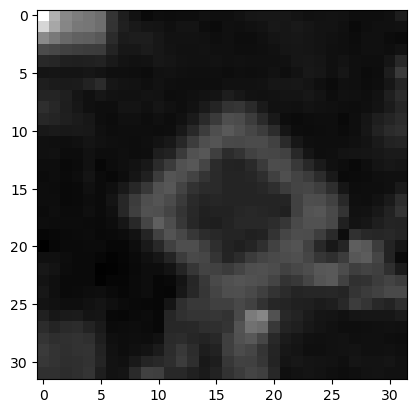

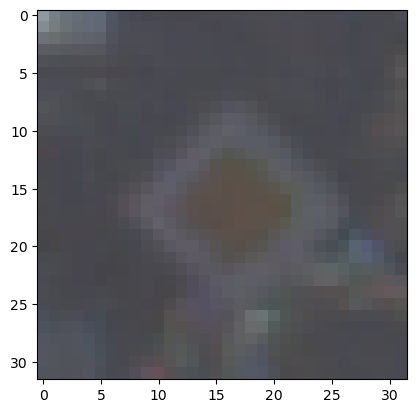

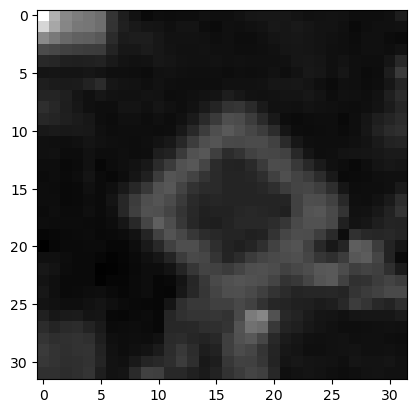

In [17]:
i=1000
plt.imshow(x_train_gray_norm[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray[i].squeeze(),cmap='gray')

In [18]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [19]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation="relu",input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu"))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120,activation="relu"))
cnn_model.add(Dense(units=84,activation="relu"))
cnn_model.add(Dense(units=43,activation="softmax"))   # we can also use sigmoid

In [20]:
cnn_model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [21]:
history= cnn_model.fit(x_train_gray_norm,
             y_train,
             batch_size=500,
             epochs=50,
             verbose=1,
             validation_data=(x_val_gray_norm,y_val))

Epoch 1/50
70/70 [==============================] - 84s 1s/step - loss: 3.0849 - accuracy: 0.1958 - val_loss: 2.5127 - val_accuracy: 0.3605
Epoch 2/50
70/70 [==============================] - 45s 633ms/step - loss: 1.5797 - accuracy: 0.5511 - val_loss: 1.4542 - val_accuracy: 0.6014
Epoch 3/50
70/70 [==============================] - 49s 699ms/step - loss: 0.9208 - accuracy: 0.7320 - val_loss: 1.1077 - val_accuracy: 0.6678
Epoch 4/50
70/70 [==============================] - 33s 473ms/step - loss: 0.6680 - accuracy: 0.8104 - val_loss: 0.9215 - val_accuracy: 0.7331
Epoch 5/50
70/70 [==============================] - 47s 673ms/step - loss: 0.5331 - accuracy: 0.8501 - val_loss: 0.8340 - val_accuracy: 0.7567
Epoch 6/50
70/70 [==============================] - 47s 668ms/step - loss: 0.4317 - accuracy: 0.8813 - val_loss: 0.7945 - val_accuracy: 0.7789
Epoch 7/50
70/70 [==============================] - 64s 914ms/step - loss: 0.3765 - accuracy: 0.8964 - val_loss: 0.7288 - val_accuracy: 0.7964
Ep

# lets evaluate model evaluation 

In [24]:
score=cnn_model.evaluate(x_test_gray_norm,y_test)
print("accuracy is {}".format(score[1]))

395/395 [==============================] - 6s 15ms/step - loss: 1.4486 - accuracy: 0.8501
accuracy is 0.8501187562942505


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

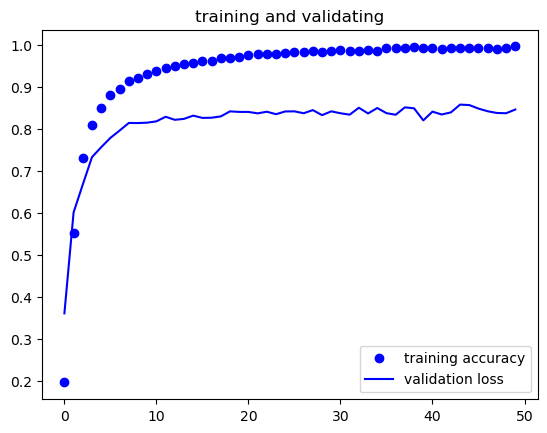

In [30]:
accuracy=history.history["accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
val_acc=history.history["val_accuracy"]

epochs=range(len(accuracy))

plt.plot(epochs,accuracy,"bo",label="training accuracy")
plt.plot(epochs,val_acc,"b",label="validation loss")
plt.title("training and validating")
plt.legend()